#Машинное обучение с учителем: линейные модели, измерение качества модели, ансамблевые модели

## Линейная регрессия

Рассмотрим пример предсказания цены на недвижимость. Будем использовать случайно сгенерированные данные.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.DataFrame({
    'кол-во комнат': np.random.randint(1, 5, 1000),
    'площадь': np.random.normal(50, 10, 1000),
    'этаж': np.random.randint(1, 10, 1000),
    'расстояние до центра': np.random.normal(5, 1, 1000),
    'наличие балкона': np.random.choice([0, 1], 1000),
    'год постройки': np.random.randint(1950, 2022, 1000),
    'высота потолков': np.random.normal(3, 0.5, 1000),
    'экология района': np.random.normal(0.5, 0.2, 1000),
    'расстояние до метро': np.random.normal(1, 0.3, 1000),
    'наличие парковки': np.random.choice([0, 1], 1000),
    'цена': 100000*np.random.normal(50, 10, 1000)
})

In [ ]:
X = data.drop('цена', axis=1)
y = data['цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

print("MSE линейной регрессии:", mse_lr)
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("MSE SGDRegressor:", mse_sgd)

mse_lr > mse_sgd


## Пример вычисления метрик качества: линейная регрессия

Посмотрим на конкретный пример расчета метрик на примере встроенного в библиотеку `scikit-learn` датасета цен на квартиры в Бостоне.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# загружаем датасет
boston = load_boston()

# разделяем данные на признаки и целевую переменную
X, y = boston.data, boston.target

# разделяем данные на тренировочный и тестовый датасеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# создаем экземпляр класса LinearRegression
lr = LinearRegression()

# обучаем модель на тренировочных данных
lr.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = lr.predict(X_test)

In [ ]:
# считаем MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# считаем MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

# считаем RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# считаем R2
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.2f}")

## Пример вычисления метрик качества: логистическая регрессия

Задача — предсказание злокачественности клетки по биологическим и физическим характеристикам клетки.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Загрузка данных
data = load_breast_cancer()

# Разделяем данные на тренировочный и тестовый датасеты
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)



In [ ]:
# Обучение модели
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Предсказание меток для тестовой выборки
y_pred = model.predict(X_test)

# Вычисление accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Вычисление precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Вычисление recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Вычисление f1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Ошибка 1 рода (false positive rate)
fpr = cm[0,1] / cm[0,:].sum()
print("False positive rate:", fpr)

# Ошибка 2 рода (false negative rate)
fnr = cm[1,0] / cm[1,:].sum()
print("False negative rate:", fnr)

In [ ]:
# Получение вероятностей принадлежности классу 1
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисление ROC кривой и площади под ней (ROC-AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Применение ансамблевых моделей

Cравним производительность моделей регрессии дерева решений, случайного леса и градиентного бустинга.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Decision Tree:
MSE:  10.416078431372549
R^2:  0.8579634380978161

Random Forest:
MSE:  7.901513892156864
R^2:  0.8922527442109116

Gradient Boosting:
MSE:  6.208861361528038
R^2:  0.9153342280466539


Text(0, 0.5, 'Predicted')

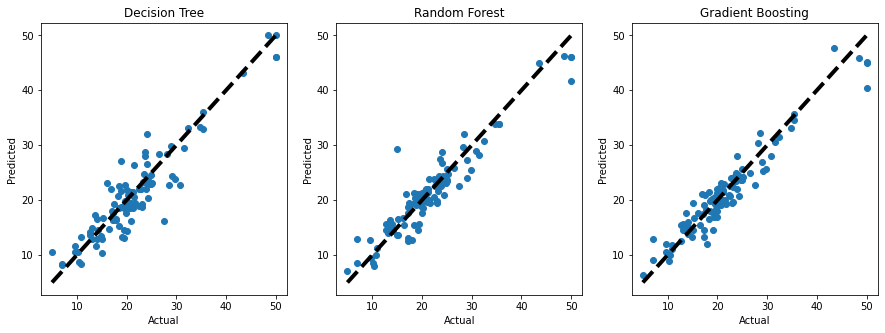

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

# Train and evaluate random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Train and evaluate gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print the evaluation metrics
print("Decision Tree:")
print("MSE: ", dt_mse)
print("R^2: ", dt_r2)
print("\nRandom Forest:")
print("MSE: ", rf_mse)
print("R^2: ", rf_r2)
print("\nGradient Boosting:")
print("MSE: ", gb_mse)
print("R^2: ", gb_r2)


In [ ]:
# Plot the predicted vs actual values for each model
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(y_test, dt_y_pred)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[0].set_title("Decision Tree")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[1].scatter(y_test, rf_y_pred)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[2].scatter(y_test, gb_y_pred)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")